In [2]:
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.table import Table
from astropy import units as u
import astropy.constants
from astropy.io import ascii,fits

from telfit import Modeler

import scipy.ndimage as scipynd
from scipy.optimize import curve_fit
from astropy import  convolution


DEIMOS_DROPBOX = '/Users/mgeha/Dropbox/DEIMOS/'


Create telluric synthetic models, binned at 0.02AA.   This choice is so that resolution is more than 10x larger than DEIMOS.

In [3]:
# RUN TELFIT SOFTWARE
# INSTALLED FROM https://github.com/freddavies/Telluric-Fitter-py3
# 
def run_telfit(h2o,o2):
    
    # DEIMOS WAVELENGTH RANGE
    wave_deimos = np.arange(6000,9500,0.02)  # DEFINE 0.01A GRID

    # HARDWIRE TO MAUNA KEA
    alt = 4.2
    lat = 19.8

    # START/END WAVELENGTH IN NM
    wavestart = 600.0
    waveend   = 950.0
       
    o2=o2*1e5
    
    #GENERATE A TELLURIC SPECTRUM -- DEFAULT RESOLUTION 0.001AA
    modeler = Modeler()
    print(h2o,o2)
    model = modeler.MakeModel(humidity=h2o,o2=o2,
                          lowfreq=1e7/waveend,
                          highfreq=1e7/wavestart, lat=lat, alt=alt)

    tell = model.toarray()

    # CONVERT TO ANGSTRUM
    wave = 10. * tell[:,0]
    flux = tell[:,1]
    
    # DETERMINE BINNING
    bins = wave - np.roll(wave,1) 
    print('binning = ',np.median(bins))
    
    
    # SMOOTH AND REBIN TO LINEAR 0.02A PIXELS
    sig_res = 0.02/np.median(bins)
    print('Kernal ',sig_res)
    gauss_kernel = convolution.Gaussian1DKernel(sig_res)
    smooth_flux  = convolution.convolve(flux, gauss_kernel)

    tell_flux = np.interp(wave_deimos,wave,smooth_flux)

    plt.plot(wave,flux)
    plt.plot(wave_deimos,tell_flux)
    plt.xlim(6900,6910)
    
    return tell_flux

In [4]:
# DEFINE 0.01A WAVELENGTH GRID
wave_deimos = np.arange(6000,9500,0.02)


In [5]:
# GRID OF PARAMETERS

# FAKE VALUES BETWEEN H2O = 38 to 44
# 44. = 45 
# 42 = 44.2 done
# 40 = 37. done
# 38 = 36.5

# COARSE GRID POINTS
#o2_grid  = np.arange(0.7, 2.1,0.1)
#h2o_grid = 1.*np.arange(5,105,5) 


# FINE GRID POINTS
o2_grid  = np.arange(0.7, 2.1,0.05)
h2o_grid = 1.*np.arange(2,102,2) 


2.0 0.7
2.0 0.75
2.0 0.8
2.0 0.8500000000000001
2.0 0.9000000000000001
2.0 0.9500000000000002
2.0 1.0000000000000002
2.0 1.0500000000000003
2.0 1.1000000000000003
2.0 1.1500000000000004
2.0 1.2000000000000004
2.0 1.2500000000000004
2.0 1.3000000000000005
2.0 1.3500000000000005
2.0 1.4000000000000006
2.0 1.4500000000000006
2.0 1.5000000000000007
2.0 1.5500000000000007
2.0 1.6000000000000008
2.0 1.6500000000000008
2.0 1.7000000000000008
2.0 1.7500000000000009
2.0 1.800000000000001
2.0 1.850000000000001
2.0 1.900000000000001
2.0 1.950000000000001
2.0 2.000000000000001
2.0 2.050000000000001
4.0 0.7
4.0 0.75
4.0 0.8
4.0 0.8500000000000001
4.0 0.9000000000000001
4.0 0.9500000000000002
4.0 1.0000000000000002
4.0 1.0500000000000003
4.0 1.1000000000000003
4.0 1.1500000000000004
4.0 1.2000000000000004
4.0 1.2500000000000004
4.0 1.3000000000000005
4.0 1.3500000000000005
4.0 1.4000000000000006
4.0 1.4500000000000006
4.0 1.5000000000000007
4.0 1.5500000000000007
4.0 1.6000000000000008
4.0 1.6500000

binning =  0.0016143340003509365
Kernal  12.389009954354083
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_60_o2_1.05_.fits
60.0 1.1000000000000003
60.0 110000.00000000003
binning =  0.0016143340003509365
Kernal  12.389009954354083
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_60_o2_1.10_.fits
60.0 1.1500000000000004
60.0 115000.00000000003
binning =  0.0016143340003509365
Kernal  12.389009954354083
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_60_o2_1.15_.fits
60.0 1.2000000000000004
60.0 120000.00000000004
binning =  0.0016143340003509365
Kernal  12.389009954354083
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_60_o2_1.20_.fits
60.0 1.2500000000000004
60.0 125000.00000000004
binning =  0.0016143340003509365
Kernal  12.389009954354083
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_60_o2_1.25_.fits
60.0 1.3000000000000005
60.0 130000.00000000004
binning = 

binning =  0.0016137294337568164
Kernal  12.393651365358892
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_62_o2_1.75_.fits
62.0 1.800000000000001
62.0 180000.0000000001
binning =  0.0016137294337568164
Kernal  12.393651365358892
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_62_o2_1.80_.fits
62.0 1.850000000000001
62.0 185000.0000000001
binning =  0.0016137294337568164
Kernal  12.393651365358892
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_62_o2_1.85_.fits
62.0 1.900000000000001
62.0 190000.00000000012
binning =  0.0016137294337568164
Kernal  12.393651365358892
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_62_o2_1.90_.fits
62.0 1.950000000000001
62.0 195000.00000000012
binning =  0.0016137294337568164
Kernal  12.393651365358892
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_62_o2_1.95_.fits
62.0 2.000000000000001
62.0 200000.0000000001
binning =  0.00161

binning =  0.001617327174244565
Kernal  12.366081717103265
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_66_o2_1.10_.fits
66.0 1.1500000000000004
66.0 115000.00000000003
binning =  0.001617327174244565
Kernal  12.366081717103265
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_66_o2_1.15_.fits
66.0 1.2000000000000004
66.0 120000.00000000004
binning =  0.001617327174244565
Kernal  12.366081717103265
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_66_o2_1.20_.fits
66.0 1.2500000000000004
66.0 125000.00000000004
binning =  0.001617327174244565
Kernal  12.366081717103265
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_66_o2_1.25_.fits
66.0 1.3000000000000005
66.0 130000.00000000004
binning =  0.001617327174244565
Kernal  12.366081717103265
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_66_o2_1.30_.fits
66.0 1.3500000000000005
66.0 135000.00000000006
binning =  0.00

binning =  0.0016171611123354523
Kernal  12.367351556652658
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_68_o2_1.80_.fits
68.0 1.850000000000001
68.0 185000.0000000001
binning =  0.0016171611123354523
Kernal  12.367351556652658
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_68_o2_1.85_.fits
68.0 1.900000000000001
68.0 190000.00000000012
binning =  0.0016171611123354523
Kernal  12.367351556652658
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_68_o2_1.90_.fits
68.0 1.950000000000001
68.0 195000.00000000012
binning =  0.0016171611123354523
Kernal  12.367351556652658
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_68_o2_1.95_.fits
68.0 2.000000000000001
68.0 200000.0000000001
binning =  0.0016171611123354523
Kernal  12.367351556652658
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_68_o2_2.00_.fits
68.0 2.050000000000001
68.0 205000.00000000012
binning =  0.0016

/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_72_o2_1.10_.fits
72.0 1.1500000000000004
72.0 115000.00000000003
binning =  0.0015579715723106347
Kernal  12.837204706076832
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_72_o2_1.15_.fits
72.0 1.2000000000000004
72.0 120000.00000000004
binning =  0.0015579715723106347
Kernal  12.837204706076832
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_72_o2_1.20_.fits
72.0 1.2500000000000004
72.0 125000.00000000004
binning =  0.0015579715723106347
Kernal  12.837204706076832
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_72_o2_1.25_.fits
72.0 1.3000000000000005
72.0 130000.00000000004
binning =  0.0015579715723106347
Kernal  12.837204706076832
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_72_o2_1.30_.fits
72.0 1.3500000000000005
72.0 135000.00000000006
binning =  0.0015579715723106347
Kernal  12.837204706076832
/Users/mge

/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_74_o2_1.80_.fits
74.0 1.850000000000001
74.0 185000.0000000001
binning =  0.0016279058436339255
Kernal  12.285722837234001
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_74_o2_1.85_.fits
74.0 1.900000000000001
74.0 190000.00000000012
binning =  0.0016279058436339255
Kernal  12.285722837234001
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_74_o2_1.90_.fits
74.0 1.950000000000001
74.0 195000.00000000012
binning =  0.0016279058436339255
Kernal  12.285722837234001
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_74_o2_1.95_.fits
74.0 2.000000000000001
74.0 200000.0000000001
binning =  0.0016279058436339255
Kernal  12.285722837234001
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_74_o2_2.00_.fits
74.0 2.050000000000001
74.0 205000.00000000012
binning =  0.0016279058436339255
Kernal  12.285722837234001
/Users/mgeha/Drop

binning =  0.0016299136623274535
Kernal  12.270588597583
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_78_o2_1.15_.fits
78.0 1.2000000000000004
78.0 120000.00000000004
binning =  0.0016299136623274535
Kernal  12.270588597583
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_78_o2_1.20_.fits
78.0 1.2500000000000004
78.0 125000.00000000004
binning =  0.0016299136623274535
Kernal  12.270588597583
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_78_o2_1.25_.fits
78.0 1.3000000000000005
78.0 130000.00000000004
binning =  0.0016299136623274535
Kernal  12.270588597583
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_78_o2_1.30_.fits
78.0 1.3500000000000005
78.0 135000.00000000006
binning =  0.0016299136623274535
Kernal  12.270588597583
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_78_o2_1.35_.fits
78.0 1.4000000000000006
78.0 140000.00000000006
binning =  0.001629913662

/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_80_o2_1.85_.fits
80.0 1.900000000000001
80.0 190000.00000000012
binning =  0.0015609461320309492
Kernal  12.812741957967487
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_80_o2_1.90_.fits
80.0 1.950000000000001
80.0 195000.00000000012
binning =  0.0015609461320309492
Kernal  12.812741957967487
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_80_o2_1.95_.fits
80.0 2.000000000000001
80.0 200000.0000000001
binning =  0.0015609461320309492
Kernal  12.812741957967487
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_80_o2_2.00_.fits
80.0 2.050000000000001
80.0 205000.00000000012
binning =  0.0015609461320309492
Kernal  12.812741957967487
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_80_o2_2.05_.fits
82.0 0.7
82.0 70000.0
binning =  0.0016313185537910613
Kernal  12.260021167246279
/Users/mgeha/Dropbox/DEIMOS//templates/fi

binning =  0.0016313185537910613
Kernal  12.260021167246279
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_84_o2_1.20_.fits
84.0 1.2500000000000004
84.0 125000.00000000004
binning =  0.0016313185537910613
Kernal  12.260021167246279
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_84_o2_1.25_.fits
84.0 1.3000000000000005
84.0 130000.00000000004
binning =  0.0016313185537910613
Kernal  12.260021167246279
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_84_o2_1.30_.fits
84.0 1.3500000000000005
84.0 135000.00000000006
binning =  0.0016313185537910613
Kernal  12.260021167246279
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_84_o2_1.35_.fits
84.0 1.4000000000000006
84.0 140000.00000000006
binning =  0.0016313185537910613
Kernal  12.260021167246279
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_84_o2_1.40_.fits
84.0 1.4500000000000006
84.0 145000.00000000006
binning = 

binning =  0.0016327020239259582
Kernal  12.249632637747613
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_86_o2_1.90_.fits
86.0 1.950000000000001
86.0 195000.00000000012
binning =  0.0016327020239259582
Kernal  12.249632637747613
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_86_o2_1.95_.fits
86.0 2.000000000000001
86.0 200000.0000000001
binning =  0.0016327020239259582
Kernal  12.249632637747613
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_86_o2_2.00_.fits
86.0 2.050000000000001
86.0 205000.00000000012
binning =  0.0016327020239259582
Kernal  12.249632637747613
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_86_o2_2.05_.fits
88.0 0.7
88.0 70000.0
binning =  0.0016344224186468637
Kernal  12.236738661819125
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_88_o2_0.70_.fits
88.0 0.75
88.0 75000.0
binning =  0.0016344224186468637
Kernal  12.236738661819125
/User

/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_90_o2_1.20_.fits
90.0 1.2500000000000004
90.0 125000.00000000004
binning =  0.0016344224186468637
Kernal  12.236738661819125
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_90_o2_1.25_.fits
90.0 1.3000000000000005
90.0 130000.00000000004
binning =  0.0016344224186468637
Kernal  12.236738661819125
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_90_o2_1.30_.fits
90.0 1.3500000000000005
90.0 135000.00000000006
binning =  0.0016344224186468637
Kernal  12.236738661819125
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_90_o2_1.35_.fits
90.0 1.4000000000000006
90.0 140000.00000000006
binning =  0.0016344224186468637
Kernal  12.236738661819125
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_90_o2_1.40_.fits
90.0 1.4500000000000006
90.0 145000.00000000006
binning =  0.0016344224186468637
Kernal  12.236738661819125
/Users/mge

/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_92_o2_1.90_.fits
92.0 1.950000000000001
92.0 195000.00000000012
binning =  0.0016364295206585666
Kernal  12.221730143288529
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_92_o2_1.95_.fits
92.0 2.000000000000001
92.0 200000.0000000001
binning =  0.0016364295206585666
Kernal  12.221730143288529
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_92_o2_2.00_.fits
92.0 2.050000000000001
92.0 205000.00000000012
binning =  0.0016364295206585666
Kernal  12.221730143288529
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_92_o2_2.05_.fits
94.0 0.7
94.0 70000.0
binning =  0.0016378336435991514
Kernal  12.21125239316116
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_94_o2_0.70_.fits
94.0 0.75
94.0 75000.0
binning =  0.0016378336435991514
Kernal  12.21125239316116
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02

binning =  0.0016378336435991514
Kernal  12.21125239316116
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_96_o2_1.25_.fits
96.0 1.3000000000000005
96.0 130000.00000000004
binning =  0.0016378336435991514
Kernal  12.21125239316116
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_96_o2_1.30_.fits
96.0 1.3500000000000005
96.0 135000.00000000006
binning =  0.0016378336435991514
Kernal  12.21125239316116
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_96_o2_1.35_.fits
96.0 1.4000000000000006
96.0 140000.00000000006
binning =  0.0016378336435991514
Kernal  12.21125239316116
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_96_o2_1.40_.fits
96.0 1.4500000000000006
96.0 145000.00000000006
binning =  0.0016378336435991514
Kernal  12.21125239316116
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_96_o2_1.45_.fits
96.0 1.5000000000000007
96.0 150000.00000000006
binning =  0.00

/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_98_o2_1.95_.fits
98.0 2.000000000000001
98.0 200000.0000000001
binning =  0.0016398253865190782
Kernal  12.1964205240503
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_98_o2_2.00_.fits
98.0 2.050000000000001
98.0 205000.00000000012
binning =  0.0016398253865190782
Kernal  12.1964205240503
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_98_o2_2.05_.fits
100.0 0.7
100.0 70000.0
binning =  0.0016401299808421754
Kernal  12.194155483780854
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_100_o2_0.70_.fits
100.0 0.75
100.0 75000.0
binning =  0.0016401299808421754
Kernal  12.194155483780854
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_100_o2_0.75_.fits
100.0 0.8
100.0 80000.0
binning =  0.0016401299808421754
Kernal  12.194155483780854
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_100_o2_0.80_.

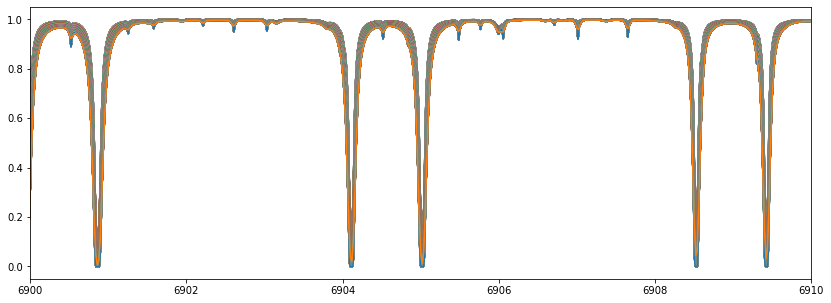

In [6]:
plt.figure(figsize=(14,5))

for h2o in h2o_grid:
    th2o = h2o
    
    
    if (h2o ==38):
        th2o=36.5
    if (h2o ==40):
        th2o=37.1
    if (h2o ==42):
        th2o=44.2
    if (h2o ==44):
        th2o=45.        
              
        
        
        
    for o2 in o2_grid:

        # EXTRA '_' for reading purposes
        outname = DEIMOS_DROPBOX + '/templates/fine_tellurics/telluric_0.02A_h2o_{}_o2_{:2.2f}_.fits'.format(int(h2o),o2)

        print(h2o,o2)
        
        twave = wave_deimos
        if not os.path.isfile(outname):
            tflux = run_telfit(th2o,o2)
            print(outname)

            t = Table([twave,tflux], names=('wave', 'flux'))
            t.meta['h2o'] = h2o
            t.meta['o2']  = o2

            t.write(outname, format='fits')

In [ ]:
clr = ['blue','red']
o2_val  = 1.e5 * np.array([0.7,2.0])
h2o_val = np.array([2,98])
losvd_pix = 0.5/0.01

for h2o in h2o_val:
    
    plt.figure(figsize=(16,5))
    for o2,c in zip(o2_val,clr):
        tfile = DEIMOS_DROPBOX + '/templates/fine_tellurics/telluric_0.02A_h2o_{}_o2_{:2.2f}_.fits'.format(int(h2o),o2/1.e5)
        
        hdu  = fits.open(tfile)
        data =  hdu[1].data
        twave = np.array(data['wave']).flatten()
        tflux = np.array(data['flux']).flatten()

        cflux = scipynd.gaussian_filter1d(tflux,losvd_pix)#,mode='nearest')
        t = 'o2={:0.2e}   h2o={:0.0f}'.format(o2,h2o)
        plt.plot(twave,cflux,alpha=0.5,label=t,color=c)
        plt.title('Changes in O2')

    plt.legend()
#plt.xlim(8200,8500)

In [ ]:
clr = ['blue','red']

for o2 in o2_val:
    
    plt.figure(figsize=(16,5))
    for h2o,c in zip(h2o_val,clr):
        tfile = DEIMOS_DROPBOX + '/templates/fine_tellurics/telluric_0.02A_h2o_{}_o2_{:2.2f}_.fits'.format(int(h2o),o2/1.e5)
        
        hdu  = fits.open(tfile)
        data =  hdu[1].data
        twave = np.array(data['wave']).flatten()
        tflux = np.array(data['flux']).flatten()

 
        cflux = scipynd.gaussian_filter1d(tflux,losvd_pix)#,mode='nearest')
        plt.plot(twave,cflux,alpha=0.5,color=c)
        t = 'o2={:0.2e}   h2o={:0.0f}'.format(o2,h2o)
        plt.plot(twave,cflux,alpha=0.25,label=t,color=c)
        plt.title('Changes in H2O')
    plt.legend()
   # plt.xlim(8100,8350)